# De relatie tussen het aantal schietincidenten en het BBP per hoofd in de Verenigde Staten

<br>Mouna Ben Kaddour (14636549)</br>
Rutger Bleeker (13797646)
<br>Benjamin Kuus (14394081)</br>
Lile Lin (14654806)

Groep: D1

In [1]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from plotly.subplots import make_subplots

In [2]:
gdp = pd.read_csv('gdp_cleaned.csv')
gv = pd.read_csv('gvcleaned.csv')

## Introductie

Het aantal schietincidenten in de Verenigde Staten (VS) loopt in de loop van de jaren toe (Silva, 2021), zoals te zien is in Figuur 1. De lijngrafiek laat zien dat in de jaren van 2013 tot en met 2017 het aantal schietincidenten is toegenomen. Recente schietincidenten die veel impact hebben gehad op de bevolking zijn bijvoorbeeld El Paso (2019), Parkland (2018) en Las Vegas (2017) (Schildkraut & Turanovic, 2022). De stijging van het aantal schietincidenten zorgt voor veel onrust over het wapengebruik in de VS. Hedendaagse plekken, zoals scholen, supermarkten en werkplaatsen moeten door schietincidenten maatregelen nemen tegen het wapengeweld. Het is van belang dat de impact van het wapengeweld wordt besproken, zodat het wapengeweld niet alleen de aandacht trekt van het publiek, maar ook van beleidsmakers en wetenschappers.

In [8]:
gv['date'] = pd.to_datetime(gv['date'])

gv13 = gv[gv['date'].dt.year == 2013]
gv14 = gv[gv['date'].dt.year == 2014]
gv15 = gv[gv['date'].dt.year == 2015]
gv16 = gv[gv['date'].dt.year == 2016]
gv17 = gv[gv['date'].dt.year == 2017]

x = [2013, 2014, 2015, 2016, 2017]
y = [len(gv13), len(gv14), len(gv15), len(gv16), len(gv17)]

fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))
fig.update_xaxes(
    ticktext=x,
    tickvals=[x[i] for i in range(len(x))],
    tickmode='array',
)

# fig.update_layout(xaxis_title='Jaar<br><br>Figuur 1. Toename van schietincidenten in de VS in verloop van jaar<br><br><sup>De y-as geeft het aantal schietincidenten weer per tienduizenden. De x-as geeft de periode 2013-2017 in jaren weer.<br>In de periode van 2013-2017 is het aantal schietincidenten in de VS toegenomen. Een uitschieter is het jaar 2013, <br>omdat de organisatie in dit jaar begon met het bijhouden van schietincidenten.</br></sup>', 
#                   yaxis_title='Aantal schietincidenten'
# )

fig.update_layout(title = 'Toename van schietincidenten in de VS in verloop van jaar')

fig.show()

> *Figuur 1. Toename van schietincidenten in de VS in verloop van jaar. De y-as geeft het aantal schietincidenten weer per tienduizenden. De x-as geeft de periode 2013-2017 in jaren weer. In de periode van 2013-2017 is het aantal schietincidenten in de VS toegenomen. Een uitschieter is het jaar 2013, omdat de organisatie in dit jaar begon met het bijhouden van schietincidenten*

Het bruto binnenlands product (BBP) wordt gebruikt als een standaard meetinstrument voor de toegevoegde waarde van alle in een land geproduceerde goederen en diensten tijdens een bepaalde periode, waar meestal een jaar voor wordt aangenomen. Het BBP dient als een maatstaaf voor economische activiteit (Gross domestic product (GDP), 2017). Het BBP per hoofd is het landelijk BBP gedeeld door het aantal inwoners van een land (Bruto binnenlands product - Wat is dat? | SumUp Facturen, z.d.). Net zoals het aantal schietincidenten, neemt ook het BBP per hoofd van de bevolking in de VS toe (zie Figuur 2). De lijngrafiek laat zien dat in de jaren van 2013 tot en met 2017 het BBP per hoofd is toegenomen.

In [9]:
gdp13 = gdp['2013']
gdp14 = gdp['2014']
gdp15 = gdp['2015']
gdp16 = gdp['2016']
gdp17 = gdp['2017']

x = [2013, 2014, 2015, 2016, 2017]
y = [sum(gdp13)/len(gdp), sum(gdp14)/len(gdp), sum(gdp15)/len(gdp), sum(gdp16)/len(gdp), sum(gdp17)/len(gdp)]

fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))
fig.update_xaxes(
    ticktext=x,
    tickvals=[x[i] for i in range(len(x))],
    tickmode='array',
)

# fig.update_layout(xaxis_title='Jaar<br><br>Figuur 2. Toename van BBP per hoofd in de VS in verloop van jaar<br><br><sup>De y-as geeft het BBP per hoofd van de bevolking in de VS weer in dollars, weergegeven in de tienduizenden, <br>met intervallen van 500 dollar tussen de bedragen waar de jaartallen toe behoren. De x-as geeft de periode 2013-2017 in jaren weer.<br>In de periode van 2013-2017 is het BBP per hoofd in de VS toegenomen.</br></sup>', 
#                   yaxis_title='BBP per hoofd'
# )

fig.update_layout(title = 'Toename van BBP per hoofd in de VS in verloop van jaar')

fig.show()

> *Figuur 2. Toename van BBP per hoofd in de VS in verloop van jaar. De y-as geeft het BBP per hoofd van de bevolking in de VS weer in dollars, weergegeven in de tienduizenden, met intervallen van 500 dollar tussen de bedragen waar de jaartallen toe behoren. De x-as geeft de periode 2013-2017 in jaren weer. In de periode van 2013-2017 is het BBP per hoofd in de VS toegenomen.*

De VS heeft zowel een van de hoogste BBP per hoofd ter wereld (Koop, 2023) als een van de hoogste aantallen schietincidenten ter wereld (World Population Review, z.d.). Mogelijke verbanden tussen deze twee factoren zullen verder worden besproken aan de hand van de volgende perspectieven:

- Het aantal schietincidenten heeft invloed op het BBP in de Verenigde Staten
- Het aantal schietincidenten heeft geen invloed op het BBP in de Verenigde Staten

## Dataset en preprocessing

### Dataset 1: Gun Violence Data

Dataset bron (URL): https://github.com/jamesqo/gun-violence-data

De eerste dataset bevat ongeveer 260 000 schietincidenten van januari 2013 tot maart 2018. Elk schietincident is aangevuld met extra informatie, zoals de datum van het schietincident, in welke staat in de VS het heeft plaatsgevonden, het aantal gewonden en het aantal doden.

### Dataset 2: GDP per capita in US states

Dataset bron (URL): https://www.kaggle.com/datasets/solorzano/gdp-per-capita-in-us-states?resource=download

De tweede dataset toont het BBP per hoofd van alle staten en meerdere gebieden van de Verenigde Staten. De dataset bevat informatie over alle staten van 2013 tot en met 2017. Er staat dus van vijf verschillende jaren het BBP per hoofd aangegeven van elke staat in de Verenigde Staten.

### Preprocessing

#### Dataset 1: Gun Violence Data

Om dataset 1 op te schonen, was het van belang om te filteren per jaar. Dataset 2 bevat namelijk informatie tot en met 2017, waar dataset 1 door gaat tot en met 2018. Om dit op te lossen hebben we eerst een aparte dataframe voor de relevante jaren gemaakt. Door deze samen te voegen ontstond de nieuwe, opgeschoonde dataset (zie Datasets_opschonen.ipynb). 

Om dit te kunnen doen moest eerst de 'date' kolom uit dataset 1 worden geconverteerd naar een datetime format, zodat het mogelijk werd om te filteren op deze velden. Hierna werden aparte dataframes aangemaakt voor de jaren 2013 tot en met 2017. Daarna werden de dataframes via 'concat' samengevoegd, zodat alle dataframes onder elkaar staan op chronologische volgorde. Daarnaast zijn ook alle incidenten van de District of Columbia verwijderd, aangezien dit geen staat is.

#### Dataset 2: GDP per capita in US states

Voor het opschonen van dataset 2 was het belangrijk om irrelevante kolommen en rijen te verwijderen. Zo was de kolom 'Fips' irrelevant voor ons onderzoek. Daarnaast bevatte de dataset informatie over bepaalde regio's in de VS die niet kwalificeerden als staat of voorkomen in onze andere dataset. Deze hebben we via 'drop' verwijderd (zie Datasets_opschonen.ipynb).

## Eerste perspectief

Het eerste perspectief luidt als volgt: het aantal schietincidenten heeft invloed op het BBP in de Verenigde Staten. Ter ondersteuning van dit perspectief worden de volgende twee argumenten als onderbouwing gebruikt.

### Eerste argument van eerste perspectief

Een verhoogde wapenproductie leidt tot een verhoogd aantal schietincidenten en daarmee komen meer uitgaven uit het bbp voort. Volgens een rapport van Everytown for Gun Safety Support Fund (2022) kost het wapengeweld in de VS 557 miljard dollar per jaar, wat 2,6% van het BBP zou innemen. Dit argument zou kunnen aansluiten bij het perspectief dat het aantal schietincidenten invloed heeft op het BBP in de VS.

### Tweede argument van eerste perspectief

## Tweede perspectief

Het tweede perspectief luidt als volgt: het aantal schietincidenten heeft geen invloed op het BBP in de Verenigde Staten. Ter ondersteuning van dit perspectief worden de volgende twee argumenten als onderbouwing gebruikt.

### Eerste argument van tweede perspectief

Figuur 3 toont de relatie tussen het aantal schietincidenten en het gemiddelde BBP van alle staten. De zwarte lijnen tonen de gemiddeldes van deze variabelen. Volgens een artikel van Pearlstein (2018) zou een lagere BBP betekenen dat een staat een hoger aantal schietincidenten zou hebben. Deze situatie wordt met het rode kwadrant in het figuur weergegeven. Het figuur tekent echter een andere situatie: weinig staten vallen in dit gemarkeerde kwadrant. Dit betekent dat wanneer er meer schietincidenten in een staat plaatsvinden, dit niet meteen betekent dat een staat respectievelijk een ondergemiddeld BBP heeft. Dit argument zou kunnen aansluiten bij het perspectief dat het aantal schietincidenten geen invloed heeft op het BBP in de VS.

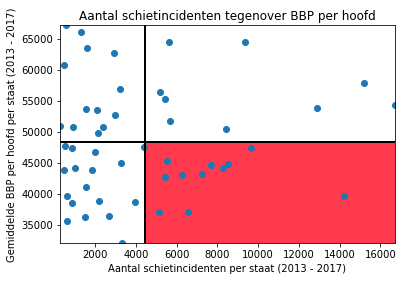

In [39]:
# groepeer bbp dataset op staat
gdp_grouped = gdp.groupby('Area').sum()
gdp_grouped = gdp_grouped.drop(['Unnamed: 0'], axis=1)

# dictionary met de staten en het totaal aantal schietincidenten en gemiddelde bbp
gv_per_state = {x: gv['state'].value_counts()[x] for x in gv['state'].unique()}
gdp_per_state = {x: gdp_grouped.loc[x].sum() / 5 for x in gdp_grouped.index}

# sorteer de dictonaries op alfabetische volgorde van de staten
gv_ps_keys = list(gv_per_state.keys())
gv_ps_keys.sort()
gv_per_state = {i: gv_per_state[i] for i in gv_ps_keys}

# maak een lijst van de waarden en bereken het totaal
gdp_total = list(list(gdp_per_state.values()))
gv_total = list(gv_per_state.values())

# maak dataframe van net berekende gegevens
gdp_gv_per_state = pd.DataFrame({'GDP per state (2013 - 2017)': gdp_total, 'Amount of gun violence incidents per state (2013 - 2017)': gv_total}, index=gv_ps_keys)

# maak plot
plt.figure()

# bereken min, max en gemiddelde voor het aantal incidenten en BBP
mingv = min(gdp_gv_per_state['Amount of gun violence incidents per state (2013 - 2017)'])
maxgv = max(gdp_gv_per_state['Amount of gun violence incidents per state (2013 - 2017)'])
mingdp = min(gdp_gv_per_state['GDP per state (2013 - 2017)'])
maxgdp = max(gdp_gv_per_state['GDP per state (2013 - 2017)'])
avggv = gdp_gv_per_state['Amount of gun violence incidents per state (2013 - 2017)'].mean()
avggdp = gdp_gv_per_state['GDP per state (2013 - 2017)'].mean()

# maak kwadranten en kleur specifiek kwadrant in via het maken van een rechthoek
ax = plt.axes()
ax.add_patch(matplotlib.patches.Rectangle((avggv,mingdp), maxgv-avggv, avggdp-mingdp, color='#FF3A4E'))
plt.plot([avggv, avggv], [0, maxgdp], linewidth=2, color='black')
plt.plot([0, maxgv], [avggdp, avggdp], linewidth=2, color='black')

# plot gegevens
x = gdp_gv_per_state['Amount of gun violence incidents per state (2013 - 2017)']
y = gdp_gv_per_state['GDP per state (2013 - 2017)']
plt.scatter(x, y)

# bepaal schaal
plt.xlim((mingv,maxgv))
plt.ylim((mingdp,maxgdp))

# labels x- en y-as en titel
plt.xlabel('Aantal schietincidenten per staat (2013 - 2017)')
plt.ylabel('Gemiddelde BBP per hoofd per staat (2013 - 2017)')

# ax.text(0.5, -0.2, "Figuur 3. Aantal schietincidenten tegenover BBP per hoofd", transform=ax.transAxes, ha='center')
# ax.text(0.5, -0.3, "De y-as geeft het gemiddelde BBP per hoofd per staat over de periode 2013-2017", transform=ax.transAxes, ha='center')
# ax.text(0.5, -0.35, "weer in de de tienduizenden. De x-as geeft het aantal schietincidenten per staat over", transform=ax.transAxes, ha='center')
# ax.text(0.5, -0.4, "de periode 2013-2017 weer in de duizenden. De zwarte horizontale lijn geeft het gemiddelde", transform=ax.transAxes, ha='center')
# ax.text(0.5, -0.45, "van de y-as weer en de zwarte verticale lijn geeft het gemiddelde van de x-as weer.", transform=ax.transAxes, ha='center')
# ax.text(0.5, -0.5, "Het rode gemarkeerde kwadrant geeft een ondergemiddeld BBP weer,", transform=ax.transAxes, ha='center')
# ax.text(0.5, -0.55, "tegenover een bovengemiddeld aantal schietincidenten.", transform=ax.transAxes, ha='center')
# ax.text(0.5, -0.6, "Een laag BBP leidt niet direct leidt tot meer schietincidenten.", transform=ax.transAxes, ha='center')

plt.title('Aantal schietincidenten tegenover BBP per hoofd')

plt.gcf().set_size_inches((6, 4))

# toon plot
plt.show()

> *Figuur 3. Aantal schietincidenten tegenover BBP per hoofd. De y-as geeft het gemiddelde BBP per hoofd per staat over de periode 2013-2017 weer in de tienduizenden. De x-as geeft het aantal schietincidenten per staat over de periode 2013-2017 weer in de duizenden. De zwarte horizontale lijn geeft het gemiddelde van de y-as weer en de zwarte verticale lijn geeft het gemiddelde van de x-as weer. Het rode gemarkeerde kwadrant geeft een ondergemiddeld BBP weer, tegenover een bovengemiddeld aantal schietincidenten. Een laag BBP leidt niet direct tot meer schietincidenten.*

### Tweede argument van tweede perspectief

In [34]:
gv['date'] = pd.to_datetime(gv['date'])

gdp_gv_per_state['code'] = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

#gdp['gv15'] = gv15counts

fig1 = go.Figure(data=go.Choropleth(
    locations=gdp_gv_per_state['code'],
    z = gdp_gv_per_state['GDP per state (2013 - 2017)'],
    locationmode = 'USA-states',
    colorscale = 'Oranges',
    colorbar_title = "Gemiddelde BBP",
))

fig1.update_layout(
    title_text = 'Gemiddelde BBP (2013 - 2017)',
    geo_scope='usa',
)

fig1.show()

> *Figuur 5. Choropleth-kaart van BBP-waarden (2013-2017). Per staat wordt het BBP weergegeven. Hoe hoger het BBP van de desbetreffende staat is, hoe donkerder de kleur van de staat wordt in een kleurenpallet, lopend van lichtgeel naar donkerrood.*

In [36]:
fig2 = go.Figure(data=go.Choropleth(
    locations=gdp_gv_per_state['code'],
    z = gdp_gv_per_state['Amount of gun violence incidents per state (2013 - 2017)'],
    locationmode = 'USA-states',
    colorscale = 'Greens',
    colorbar_title = "Aantal Schietincidenten",
))

fig2.update_layout(
    title_text = 'Aantal schietincidenten (2013 - 2017)',
    geo_scope='usa',
)

fig2.show() 

> *Figuur 6. Choropleth-kaart van aantal schietincidenten (2013-2017). Per staat wordt het aantal schietincidenten weergegeven. Hoe hoger het aantal schietincidenten van de desbetreffende staat is, hoe donkerder de kleur van de staat wordt in een kleurenpallet, lopend van lichtgroen naar donkergroen.*

## Reflectie

Tijdens één van de werkgroepen heeft peer feedback plaatsgevonden met enkele mede-studenten en de TA van dezelfde werkgroep. De mede-studenten gaven als feedback om consistent te blijven noteren dat de data over alleen de VS gaat. De TA gaf feedback over wat niet nuttig zou zijn voor de data story en hoe de nog niet ingevulde argumenten vorm zouden kunnen worden weergegeven. 

De draft-versie bevatte een staafdiagram met op de x-as het BBP en op de y-as de staten uit de VS, waarbij de staten werden gerangschikt van hoog BBP naar laag BBP. De data story benadrukt, net zoals wat de mede-studenten als feedback gaven, de VS als geheel en niet per staat. Hierdoor zou dit staafdiagram niet veel toevoegen aan het verhaal. Daarom is dit staafdiagram uit de data story verwijderd.

Daarnaast gaf de TA advies over hoe de choropleth-kaarten gebruikt zouden kunnen worden als argumenten. Zo zouden de choropleth-kaarten kunnen worden gebruikt voor het tweede perspectief. In de choropleth-kaart met het gemiddelde BBP zijn staten te zien met bijvoorbeeld een hoog BBP en in de choropleth-kaart met het aantal schietincidenten zijn bijvoorbeeld respectievelijk dezelfde staten terug te vinden met een hoog aantal schietincidenten. Dit zou erop duiden dat het BBP geen invloed zou hebben op het aantal schietincidenten.

Bovendien gaf de TA aan hoe dezelfde data uit de choropleth-kaarten gebruikt zouden kunnen worden voor het eerste perspectief. Zo zouden bijvoorbeeld door middel van "framing" specifiek staten kunnen worden uitgekozen die een hoog BBP en een laag aantal schietincidenten hebben. Dit zou erop duiden dat het BBP invloed zou hebben op het aantal schietincidenten. De TA benoemde dit ook wel als "cherry picking", een concept wat zou mogen worden gebruikt ter verdediging van een perspectief.

## Taakverdeling

## Referenties

*Bruto binnenlands product - Wat is dat? | SumUp Facturen*. (z.d.). SumUp - de slimme manier om betalingen te accepteren. Geraadpleegd op 29 juni 2023, van https://www.sumup.com/nl-nl/facturen/woordenboek/bbp/

Everytown for Gun Safety Support Fund. (2022). *The Economic Cost of Gun Violence*. Everytown Research & Policy. Geraadpleegd op 19 juni 2023, van
https://everytownresearch.org/report/the-economic-cost-of-gun-violence/?_gl=1*qram1*_ga*NjAzMDQwMjcwLjE2ODcyOTkwODg.*_ga_LT0FWV3EK3*MTY4NzQ2MzI1OC4yLjAuMTY4NzQ2MzI1OC4wLjAuMA

*Gross domestic product (GDP)*. (2017). \[Dataset]\. https://doi.org/10.1787/dc2f7aec-en

Koop, A. (2023). *Top 10 Countries By GDP Per Capita, by Region*. Visual Capitalist. Geraadpleegd op 29 juni 2023, van https://www.visualcapitalist.com/cp/ranked-countries-gdp-per-capita-2023/#:~:text=Luxembourg%2C%20Ireland%2C%20and%20Norway%20lead,region%2C%20explaining%20their%20relative%20prosperity.

Schildkraut, J., & Turanovic, J. J. (2022). A New Wave of Mass Shootings? Exploring the Potential Impact of COVID-19. *Homicide Studies*, *26*(4), 362–378. https://doi.org/10.1177/10887679221101605

Silva, J. R. (2021). Mass Shooting Outcomes: A Comparison of Completed, Attempted, Failed, and Foiled Incidents in America. *Deviant Behavior*, *43*(12), 1487–1506. https://doi.org/10.1080/01639625.2021.1991248

Pearlstein, J. (2018). The US Is the Only Country Where There Are More Guns Than People. *WIRED*. Geraadpleegd op 19 juni 2023, van https://www.wired.com/story/guns-in-america-five-charts/

World Population Review. (z.d.). *Gun Deaths by Country 2023*. Geraadpleegd op 29 juni 2023, van https://worldpopulationreview.com/country-rankings/gun-deaths-by-country